   #                                Spam Classifier using NLP

## Getting the Data

We use the read_csv() function for loading in the data. We pass into this function the URL in which the data can be found. To make it easier to work with the data in the future, we will name it by assigning it to a variable (digits in this case).
 
Note:- sep='\t'  is used as the folder is not in csv fromat and we need to mention the seprator

      names is mentioned as there are no column names mentioned 

In [13]:
import pandas as pd

In [16]:
# importing the Dataset
messages = pd.read_csv('G:\data\SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [17]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Describe the data

In [30]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [32]:
y=messages['label']
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Binary Encodeing  the label or y column 

In [33]:
from sklearn import preprocessing

In [34]:

le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

In [35]:
y_enc

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
raw_text = messages['message']

In [40]:
raw_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [41]:
messages.isnull().sum()

label      0
message    0
dtype: int64

##  Basic Visualization

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
messages["length"] = messages["message"].apply(len)

In [53]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


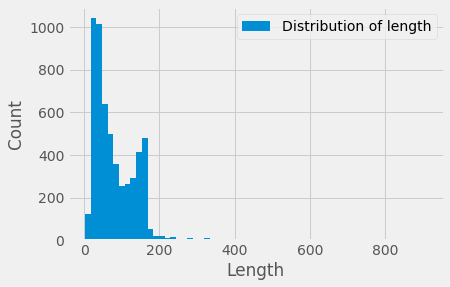

In [64]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.hist(messages['length'] ,bins=60,label='Distribution of length')

plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()


## Pre-Processing

### Contraction Mapping / Expanding Contractions

Contractions are words that we write with an apostrophe. Examples of contractions are words like “ain’t” or “aren’t”. Since we want to standardize our text, it makes sense to expand these contractions. We are going to add a new column to our dataframe called “no_contract” and apply a lambda function to the "msg" field which will expand any contractions.

In [69]:
pip install pycontractions

import pycontractions

SyntaxError: invalid syntax (<ipython-input-69-8b0411cee17f>, line 1)